## CMPE 547: HW2

### 1. Visualize the dataset using a scatter plot

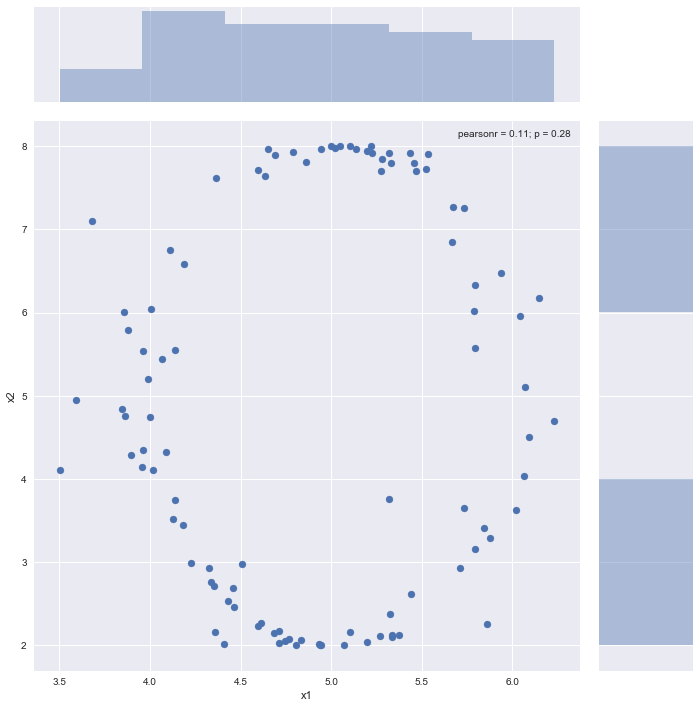

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = np.genfromtxt('data.txt', delimiter=' ',skip_header=1)
x1=data[:,0]
x2=data[:,1]

sns.set(color_codes=True)
df = pd.DataFrame(data, columns=['x1','x2'])
sns.jointplot(x="x1", y="x2", data=df,size=10,color="b");
plt.axis('equal')
plt.show()

### 2. Propose a generative model

The data sample we have plotted is distributed in an elliptic form, centered approximately at c=(5,5). The major and minor axes of this supposed ellipse are parallel to x2 and x1 axes. x1 variable takes values between 3.5 and 6.5, and x2 takes values between 2 and 8.

Our generative model must produce points that follow a essentially similar elliptic nature as the given data set, characterized by the following parametric function:

\begin{equation*}
X=x_c+cos(\tau)acos(t)-sin(\tau)bsin(t)\\
Y=y_c+sin(\tau)acos(t)+cos(\tau)bsin(t)
\end{equation*}

In matrix form:

\begin{equation*}
\left[ \begin{array}{c}x(t)\\y(t)\end{array}\right]=
\left[ \begin{array}{c}x_c\\y_c\end{array}\right] +
\begin{bmatrix} cos(\tau)&-sin(\tau)\\sin(\tau)&cos(\tau)\end{bmatrix}\times
\left[ \begin{array}{c}acos(t)\\bsin(t)\end{array}\right]
\end{equation*}

where 

* x<sub>c</sub> and y<sub>c</sub> are the coordinates of the ellipse's center,
* a and b are major and minor radii respectively,
* $ \tau $ is the counterclockwise tilt

The generative model is therefore as follows:

\begin{equation*}
w\sim\mathcal{U}(0,1)\\
u=\left[\begin{array}{c}acos(2\pi w)\\bsin(2\pi w)\end{array}\right]\\
X=C+Tu+\varepsilon
\end{equation*}

where 

* C is the center points vector
* T is the tilt matrix
* Epsilon is the system noise

### 3. Implementation of the generative model and sample data from your model

x1=[ 4.40275054  4.92596977  4.00028684  4.11264012  4.52666644  4.36576178
  4.85987907  4.15858054  4.62366185  4.06507959  5.32651505  4.19412664
  5.99029473  5.88632748  4.25150382  4.66953196  5.33914257  5.52951446
  5.38781162  5.49136575  5.29335188  4.38979445  4.08371481  5.99567972
  5.9496937   5.98509706  4.63726525  4.48728451  4.90571464  4.04725284
  5.00173572  5.64798144  4.03014826  4.40712745  5.16214192  4.39996787
  5.98246095  5.81977897  4.34190696  5.29296068  4.59512301  5.46511124
  5.78741304  4.01173854  5.77441141  5.5491687   5.32129022  4.39707191
  5.1046775   4.3102542   4.83779973  5.94361861  4.00007791  5.97767224
  4.05233743  5.88740591  5.99763332  5.54580271  5.84473186  4.33717662
  5.92895395  4.29480161  5.77907135  4.09803482  5.32363468  5.94458035
  5.90052618  4.97476732  5.80579905  5.37165492  4.2056791   4.66097723
  5.72382536  5.69490361  5.04499125  5.83012959  4.51199864  5.98034397
  4.23619367  5.15965578  4.39731844  5.72724177

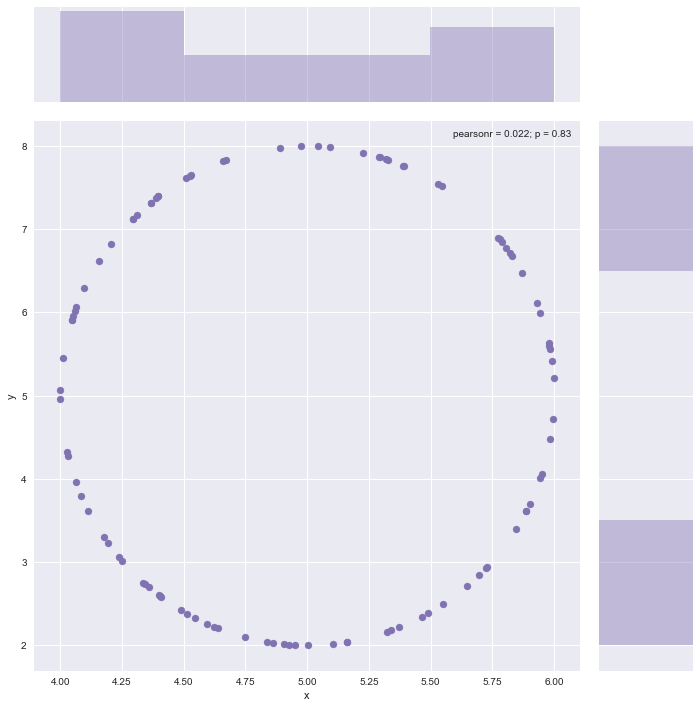

In [6]:
N=x1.shape[0]                        # N equals the sample size

center=np.array([[5],[5]])           # C
a=3                                  # major radius
b=1                                  # minor radius

# tilt matrix(90 degree tilt)
tilt=np.array([[np.cos(np.pi/2.0),-np.sin(np.pi/2.0)],[np.sin(np.pi/2.0),np.cos(np.pi/2.0)]])

w=np.random.rand(N)                  
u=np.array([a*np.cos(w*2*np.pi),b*np.sin(w*2*np.pi)]) 
X=np.dot(tilt,u)                     # tilt ellipse 90 degrees counter-clockwise
X+=center

print 'x1=%s'%+X[0,:]
print 'x2=%s'%+X[1,:]

sns.set(color_codes=True)
df = pd.DataFrame(X.T, columns=['x','y'])
sns.jointplot(x="x", y="y", data=df,size=10,color="m");
plt.axis('equal')
plt.show()

The distribution without noise outlines the data set. Now we add noise.

In [11]:
x1ns=0.10                        # x1 noise scale
x2ns=0.05                        # x2 noise scale
                 
e1=x1ns*np.random.randn(N)       # noise on x1
e2=x2ns*np.random.rand(N)        # noise on x2
E=np.mat([e1,e2]);
X+=E

### 4 Visualization of synthetic data

x1=[ 4.33547025  4.65729095  4.14121718  4.08733554  5.01893574  4.79350869
  4.89667218  4.0146611   4.48019851  4.32539353  5.58877246  4.29486358
  5.84817878  5.7181684   4.20616438  4.1697446   5.07898983  5.79564168
  5.26356761  5.3937721   5.22963175  4.30271111  3.56256024  5.93620759
  5.75565372  6.31716407  4.9230474   4.60376263  5.18149714  3.77845353
  4.94474287  5.61129986  4.01595611  4.27401315  5.25652056  4.52270771
  5.81401133  6.02474021  4.66615507  4.96421399  4.65850746  5.63197831
  5.84548137  4.11452956  5.91055392  5.4881704   5.16382649  4.08690659
  5.24287612  4.33999404  4.92074722  5.86174682  3.70385181  6.19518078
  4.12019996  5.94182269  6.13029464  5.25814482  5.5526405   4.2771709
  5.88486122  4.53116321  5.74067552  4.09947832  5.27186828  5.90912353
  6.06007639  5.09291541  5.36652074  5.31279096  4.40144229  4.9559116
  5.83534867  5.66660138  5.02688351  5.62239885  4.62745817  5.6477025
  3.68761331  4.7290386   4.29770045  5.80488893  4

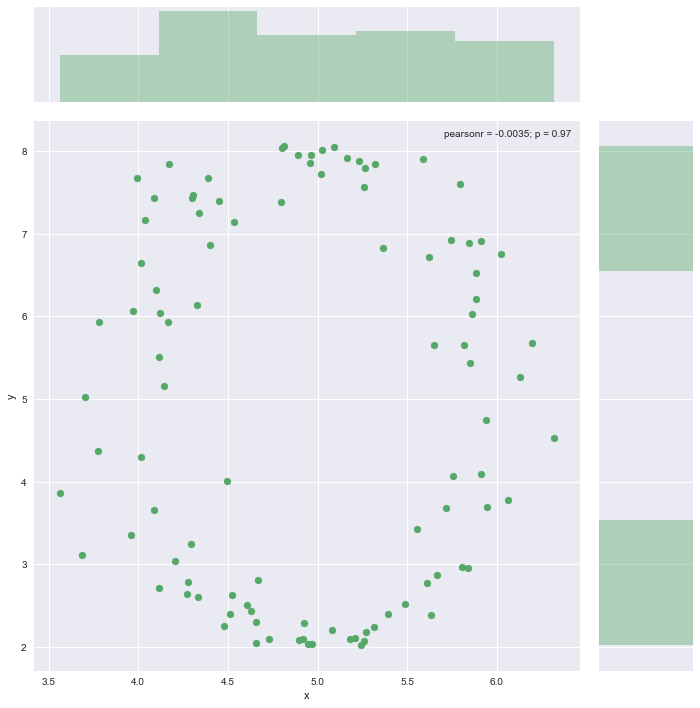

In [10]:
print 'x1=%s'%+X[0,:]
print 'x2=%s'%+X[1,:]

sns.set(color_codes=True)
df = pd.DataFrame(X.T, columns=['x','y'])
sns.jointplot(x="x", y="y", data=df,size=10,color="g");
plt.axis('equal')
plt.show()

### 5. Similarity between data sets

The two data sets can be compared in terms of location and spread, distribution of and correlation among their respective x1 and x2s.

The generative model is centered at approximately the same point (5,5) thus it is similar to the initial data set location-wise. We did not set the model's center to the exact means of the sample data in order to avoid overfitting.

Variance aspect is trickier; the two data sets are similar in terms of their spead among axes. The min and max values of the variables match. However x1 in the initial data set strictly do not go below 2 or above 8 whereas the generative model exceeds those values due to noise.

The histograms corresponding to the variables indicate that the data set sampled from our generative model is similar to the initial data set.

Correlation between variables are similar as well; both data sets show almost no correlation between x1 and x2.